# TASK 2

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import chi2
from mlxtend.feature_selection import SequentialFeatureSelector as sfs




In [50]:
df = pd.read_csv('palm_ffb.csv')

In [51]:
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [52]:
df.shape

(130, 9)

In [53]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [54]:
df.isnull().any() # checking missing data

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [56]:
df.tail()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91
129,01.10.2018,510.8,26.819355,21.0,34.4,207.0,26,771805.3922,2.04


In [61]:
skew = data.skew() # checking for skewness
kurtosis = data.kurt() #checking for data kurtosis

f = { 'Skewness': skew, 'Kurtosis': skew } 
  
skew_kurt = pd.DataFrame(f)

C:\Users\User\AppData\Local\Temp\ipykernel_34044\1818862583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew = data.skew() # checking for skewness
C:\Users\User\AppData\Local\Temp\ipykernel_34044\1818862583.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis = data.kurt() #checking for data kurtosis


In [62]:
skew_kurt

,Skewness,Kurtosis
SoilMoisture,-0.394336,-0.394336
Average_Temp,-0.340606,-0.340606
Min_Temp,-1.121358,-1.121358
Max_Temp,-0.215635,-0.215635
Precipitation,0.526227,0.526227
Working_days,-0.660814,-0.660814
HA_Harvested,-0.064445,-0.064445
FFB_Yield,0.188629,0.188629


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:title={'center':'Log Normal'}, xlabel='FFB_Yield'>

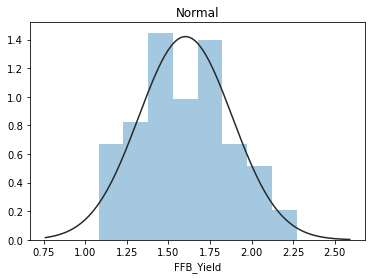

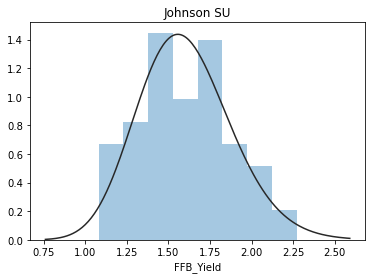

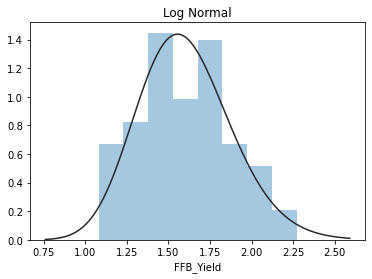

In [63]:
y = data['FFB_Yield']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

C:\Users\User\AppData\Local\Temp\ipykernel_34044\3507374983.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(df.skew(),color='green',axlabel ='Skewness')
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

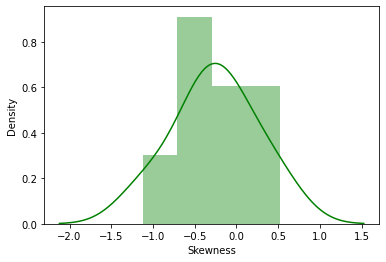

In [65]:
sns.distplot(df.skew(),color='green',axlabel ='Skewness')

C:\Users\User\AppData\Local\Temp\ipykernel_34044\2296818261.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(df.kurt(),color='blue',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


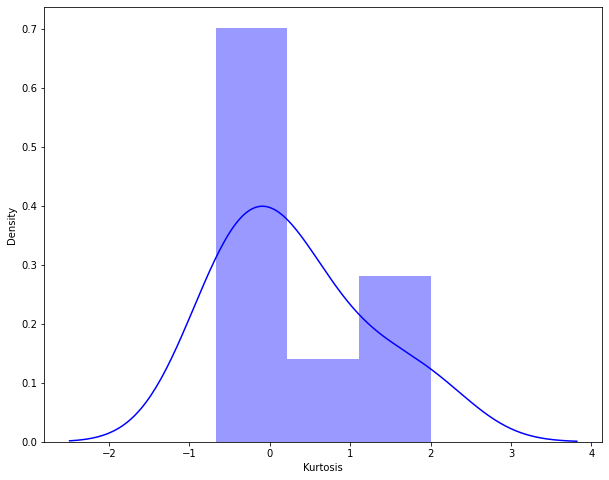

In [67]:
plt.figure(figsize = (10,8))
sns.distplot(df.kurt(),color='blue',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

## In Conclusion

- Numerical values are only available in data frame
- Variance, skewness and kurtosis shows no issue with the dataframe
- No missing values found in the dataframe

Total numerical variables available:  8
   SoilMoisture  Average_Temp  Min_Temp  Max_Temp  Precipitation  \
0         616.4     25.306452      21.3      32.2          184.4   
1         568.9     26.165517      20.9      35.1          140.2   
2         577.6     25.448387      21.3      32.9          280.4   
3         581.1     26.903333      20.6      34.8          173.3   
4         545.4     27.241935      20.9      35.0          140.6   

   Working_days  HA_Harvested  FFB_Yield  
0            25   777778.3951       1.62  
1            23   767988.2759       1.45  
2            25   783951.9231       1.56  
3            25   788987.0504       1.39  
4            25   813659.7222       1.44  


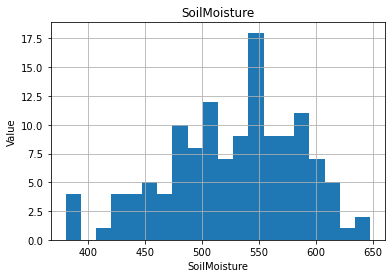

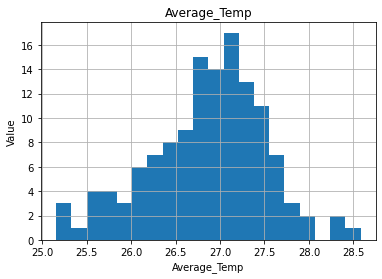

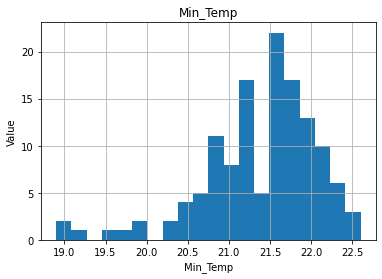

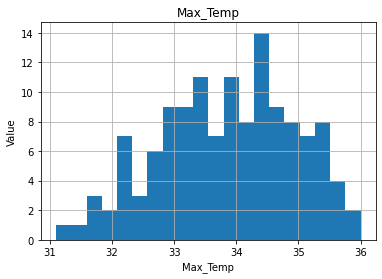

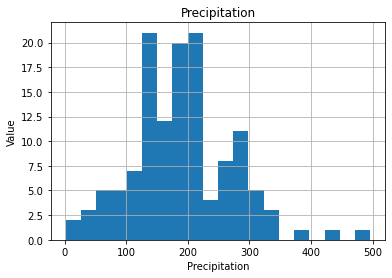

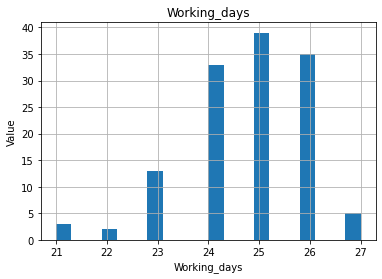

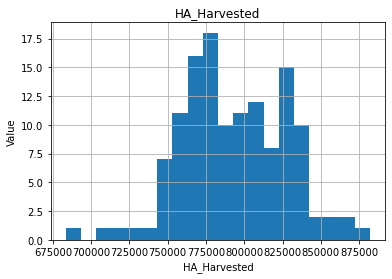

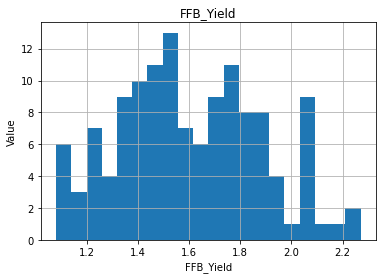

In [70]:

value_num = [val for val in df.columns if df[val].dtypes != 'O']

print('Total numerical variables available: ', len(value_num))


data_column = df[value_num].head()
print(data_column)
    
for val in value_num:
    df = df.copy()
    df[val].hist(bins=20)
    plt.ylabel('Value')
    plt.xlabel(val)
    plt.title(val)
    plt.show()


## In conclusion

- most of column data shows normally distributed except for min temp where the data column is slightly negatively skewed and working days as it is the only discrete variable in the data frame

In [73]:
discrete_value = [val for val in value_num if len(data[val].unique())<20]

print('Total discrete variables available: ', len(discrete_vars))

Total discrete variables available:  1


In [74]:
df[discrete_value].head()

,Working_days
0,25
1,23
2,25
3,25
4,25


In [75]:
df[discrete_value].describe()

,Working_days
count,130.000000
mean,24.753846
std,1.239289
min,21.000000
25%,24.000000
50%,25.000000
75%,26.000000
max,27.000000


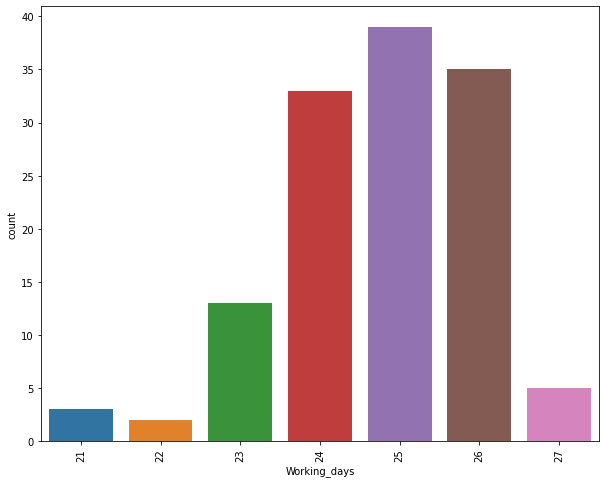

In [78]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'Working_days', data = df)
x = plt.xticks(rotation=90)

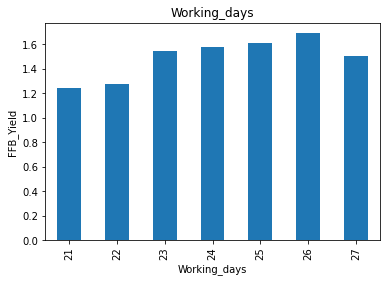

In [79]:
for val in discrete_value:
    df = df.copy()
    df.groupby(val)['FFB_Yield'].median().plot.bar()
    plt.title(val)
    plt.ylabel('FFB_Yield')
    plt.show()

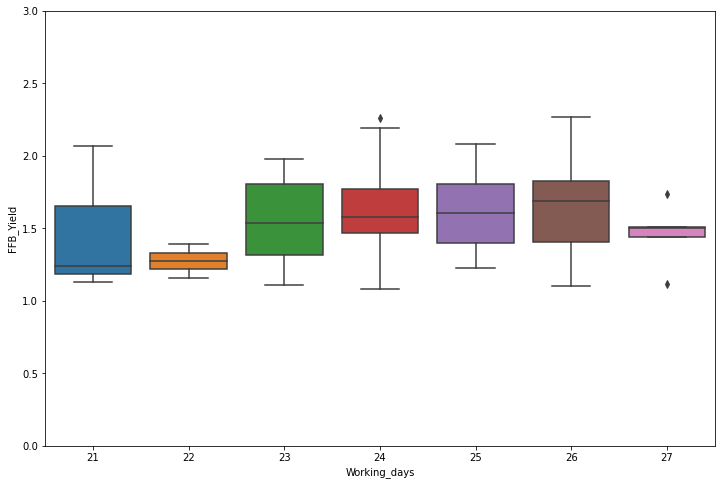

In [87]:
val = 'Working_days'
work_days = pd.concat([df['FFB_Yield'], df[val]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="FFB_Yield", data=work_days)
fig.axis(ymin=0, ymax=3);

#### The analysis above found that it is clear that the more the working days, the median yield increases. However, this is not the final findings, lets compare with other variables

In [86]:
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [93]:
## get continous variables
continous_value = [val for val in value_num if val not in discrete_value]

print('Total continous variables available:', len(continous_value))

Total continous variables available: 7


In [94]:
df[continous_value].head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,HA_Harvested,FFB_Yield
0,616.4,25.306452,21.3,32.2,184.4,777778.3951,1.62
1,568.9,26.165517,20.9,35.1,140.2,767988.2759,1.45
2,577.6,25.448387,21.3,32.9,280.4,783951.9231,1.56
3,581.1,26.903333,20.6,34.8,173.3,788987.0504,1.39
4,545.4,27.241935,20.9,35.0,140.6,813659.7222,1.44


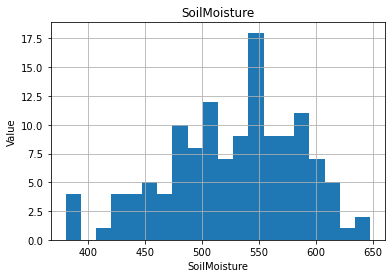

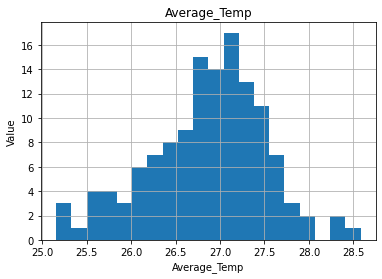

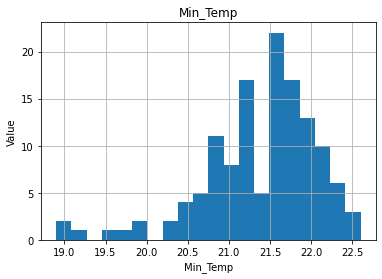

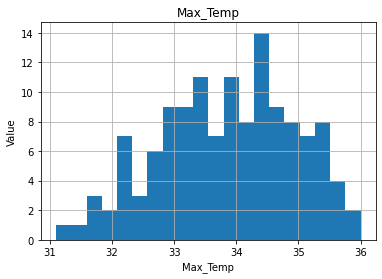

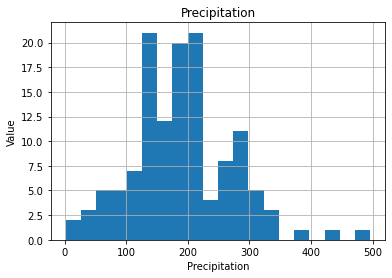

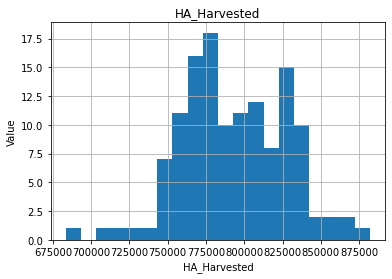

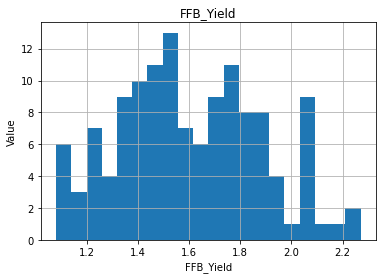

In [96]:
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for val in continous_value:
    df = df.copy()
    df[val].hist(bins=20)
    plt.ylabel('Value')
    plt.xlabel(val)
    plt.title(val)
    plt.show()

#### The distribution of all features seems not consistent and only average temp and soil moisture are normally distributed

#### Lets try distribution normal log

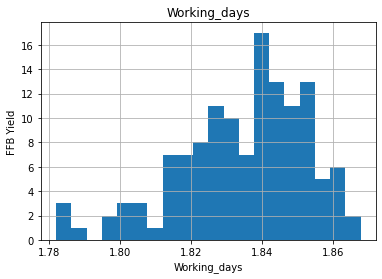

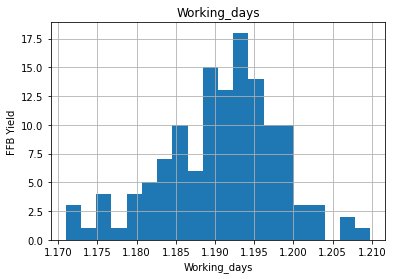

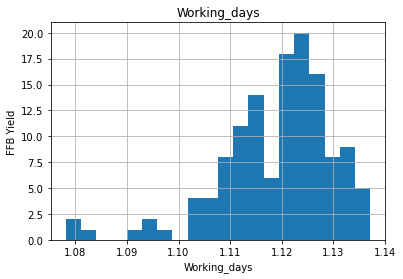

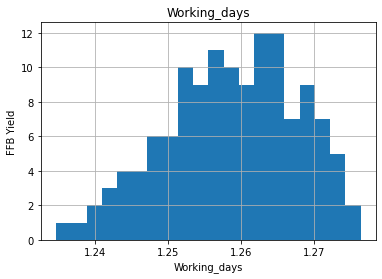

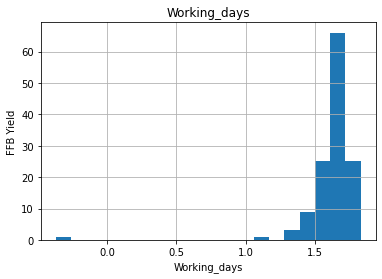

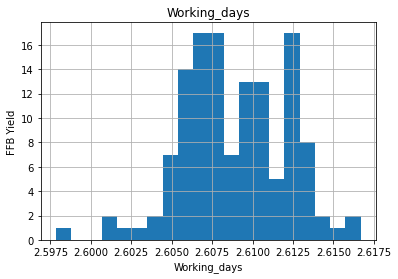

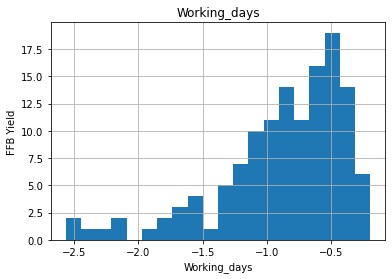

In [99]:
for val in continous_value:
    df = df.copy()
    if 0 in df[val].unique():
        pass
    else:
        # log transform the variable
        df[val] = np.log(df[val])
        df[val].hist(bins=20)
        plt.ylabel('FFB Yield')
        plt.xlabel(var)
        plt.title(var)
        plt.show()

### Conclusion

- The log-normal distribution shows worse distribution
- Comparing FFB Yield features with other continous features

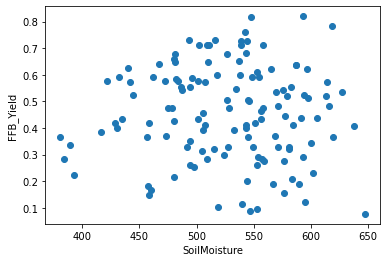

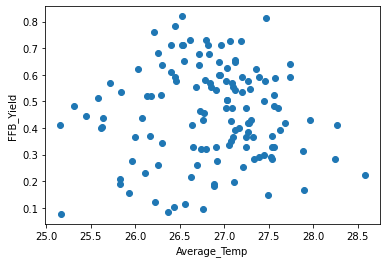

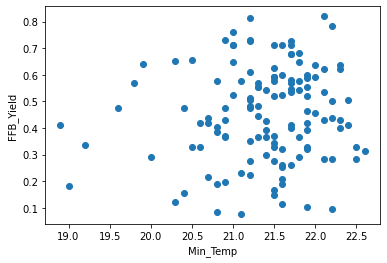

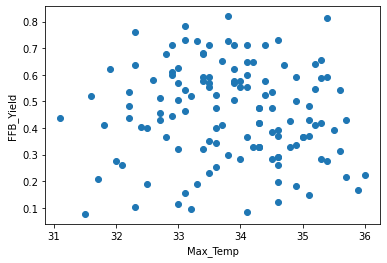

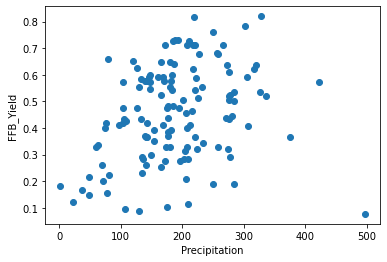

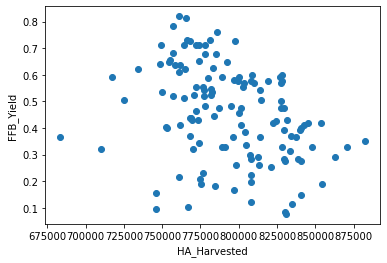

In [111]:
# let's explore the relationship between the FFB Yield and the transformed variables
# with more detail
def non_transform_analyse_continous(df, var):
    df = df.copy()
    df['FFB_Yield'] = np.log(df['FFB_Yield'])
    plt.scatter(df[var], df['FFB_Yield'])
    plt.ylabel('FFB_Yield')
    plt.xlabel(var)
    plt.show()

for val in continous_value:
    if val !='FFB_Yield':
        non_transform_analyse_continous(data, val)

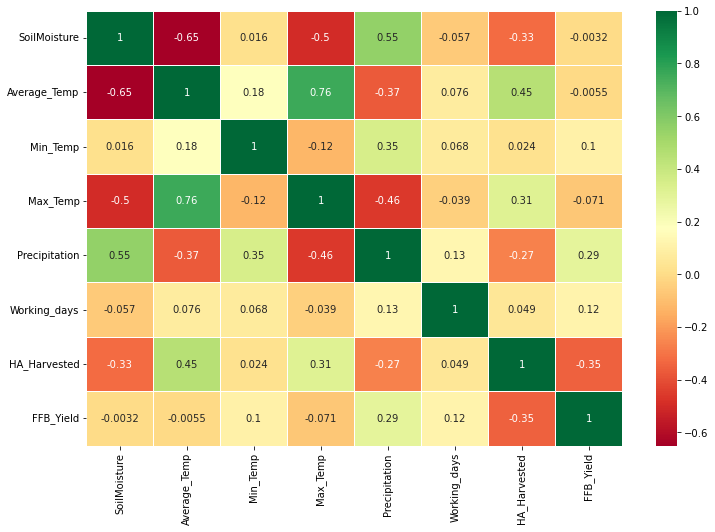

In [126]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=1) 
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [132]:
target = abs(data.corr()["FFB_Yield"])
features = target[cor_target>0.1]
print(features ,"\n")
corr = data[value_num].corr()
print(abs(corr['FFB_Yield'].sort_values(ascending = True)),'\n')

Min_Temp         0.103830
Precipitation    0.289604
Working_days     0.116364
HA_Harvested     0.350222
FFB_Yield        1.000000
Name: FFB_Yield, dtype: float64 

HA_Harvested     0.350222
Max_Temp         0.071201
Average_Temp     0.005494
SoilMoisture     0.003183
Min_Temp         0.103830
Working_days     0.116364
Precipitation    0.289604
FFB_Yield        1.000000
Name: FFB_Yield, dtype: float64 



### In conclusion
- From the heatmap, the precipitation and HA_harvested are highly correlated
- FFB yield shows strong positive correlation with working days, percipitation and min_temp
- lets perform embedded methods to get the best features for this analysis

In [139]:
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,1.860025,1.172810,1.117992,1.244721,1.651943,25,2.607434,NaN
1,01.02.2008,1.847463,1.183089,1.111775,1.269255,1.597987,23,2.606499,NaN
2,01.03.2008,1.849853,1.174540,1.117992,1.250896,1.729213,25,2.608016,NaN
3,01.04.2008,1.850802,1.191571,1.107007,1.266840,1.639972,25,2.608488,NaN
4,01.05.2008,1.840791,1.195363,1.111775,1.268453,1.598563,25,2.610753,NaN


### Using exhaustive feature selector to perform evaluation agains all possible combinatios of the features in the dataset

In [140]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs

model=efs(RandomForestRegressor(),min_features=1,max_features=7,scoring='r2',n_jobs=-1)
miniData=X[X.columns]

model.fit(np.array(miniData),y)


Features: 127/127

ExhaustiveFeatureSelector(estimator=RandomForestRegressor(), max_features=7,
                          n_jobs=-1, scoring='r2')

In [143]:
#Get the selected feature index.
model.best_idx_
miniData.columns[list(model.best_idx_)]

Index(['SoilMoisture', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Working_days',
       'HA_Harvested'],
      dtype='object')

### In Conclusion

- The best features that take part in this analysis are soil moisture, min_temp, precipitation and working days.

- Max temp are not included as it shows negative correlation with FFB yield